# Decision Tree Classification in Python

Author: Armand Tossou

Date: 12 March 2020

__Course:__ In this DataCamp tutorial by Avinash Navlani (dated: December 28th, 2018), learn Decision Tree Classification, attribute selection measures, and how to build and optimize Decision Tree Classifier using Python Scikit-learn package.

Link: https://www.datacamp.com/community/tutorials/decision-tree-classification-python  

As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience. As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a classification problem. Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

In this tutorial, you are going to cover the following topics:  
- Decision Tree Algorithm  
- How does the Decision Tree algorithm work?
- Attribute Selection Measures: Information Gain, Gain Ratio, Gini index  
- Optimizing Decision Tree Performance  
- Classifier Building in Scikit-learn  
- Pros and Cons  
- Conclusion  

## The Decision Tree Algorithm  
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

<img src="DecisionTreeAlgorithm.png" width="680">  

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.


## How Does the Decision Tree Algorithm Work  

The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.  
2. Make that attribute a decision node and breaks the dataset into smaller subsets.  
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:  
* All the tuples belong to the same attribute value.  
* There are no more remaining attributes.  
* There are no more instances.  

<img src="HowAlgoWorks.png" width="680">

## Attribute Selection Measures  
Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute ([Source](http://www.ijoart.org/docs/Construction-of-Decision-Tree--Attribute-Selection-Measures.pdf)). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

## Information Gain  
Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. <font color="blue">Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values</font>. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.  

$ Info(D) = - \sum _{i=1}^{m} p_{i} \; log_{2} \; p_{i} $  

Where, $p_{i}$ is the probability that an arbitrary tuple in D belongs to class Ci.

$ Info_{A}(D) = \sum _{j=1}^{V} \frac{|D_{j}|}{|D|} \; * \; Info(D_{j}) \; $  

and $ Gain(A) = Info(D) - Info_{A}(D) $  

where:  

* Info(D) is is the average amount of information needed to identify the class label of a tuple in D.  
* |Dj|/|D| acts as the weight of the jth partition.  
* InfoA(D) is the expected informa-tion required to classify a tuple from D based on the partitioning by A.  

The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().


## Gain Ratio  

Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info. Java implementation of the C4.5 algorithm is known as J48, which is available in WEKA data mining tool.

$ SplitInfo_{A}(D) = - \sum _{j=1}^{V} \frac{|D_{j}|}{|D|} \; * \; log_{2} \Big( \frac{|D_{j}|}{|D|} \Big) $  

Where:

* |Dj|/|D| acts as the weight of the jth partition.  
* v is the number of discrete values in attribute A.  

The gain ratio can be defined as:

$ GainRatio(A) = \frac{Gain(A)}{SplitInfo_{A}(D)} $

## Gini index  
Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.

$ Gini(D) = 1 - \sum_{i=1}^{m} P_{i}^{2} $

Where, $p_{i}$ is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

$ Gini_{A}(D) = \frac{D_{1}}{D} * Gini(D_{1}) + \frac{D_{2}}{D} * Gini(D_{2}) $

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point.

$ \Delta Gini(A) = Gini(A) - Gini_{A}(D)$

<font color="blue">The attribute with minimum Gini index is chosen as the splitting attribute.</font>

# Decision Tree Classifier Building in Scikit-learn

## Importing Required Libraries  
Let's first load the required libraries.


In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data

Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [2]:
# these are column names we want to apply to the data, instead of the names in the original file
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=0, names=col_names)
# Read documentation for proper "header" options: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [3]:
# preview data. First 5 rows
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# getting more information on the variables/features
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# getting summary statistics
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Feature Selection  
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

## Splitting Data  
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [7]:
# Split dataset into training set and test set
## 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Building the Decision Tree Model  
Let's create a Decision Tree Model using Scikit-learn.

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# print predictions. First convert NumPy array to Pandas series
print(pd.Series(y_pred))

0      0
1      1
2      0
3      1
4      0
      ..
226    0
227    0
228    0
229    1
230    0
Length: 231, dtype: int64


## Evaluating Model  
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.658008658008658


Well, you got a classification rate of 65.368%, considered as good accuracy. You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

## Visualizing the Decision Trees  

#### Option 1

You can use Scikit-learn's _export_graphviz_ function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

`pip install graphviz`  

`pip install pydotplus`  

`export_graphviz` function converts decision tree classifier into dot file and `pydotplus` converts this dot file to .png or displayable format on Jupyter.

In [21]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

AttributeError: module 'pydotplus' has no attribute 'Node'

<font color="red"> Option 1 doesn't work, because of this error message that keeps coming up, in library 'pydotplus'. Let's try option 2. </font> 

#### Option 2  

Ref.: https://mljar.com/blog/visualize-decision-tree/

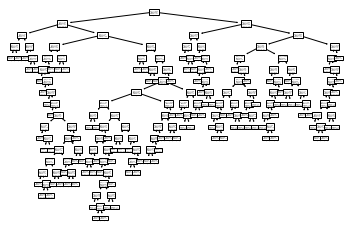

In [51]:
tree.plot_tree(clf);

We can try using Matplotlib to visualize the tree.

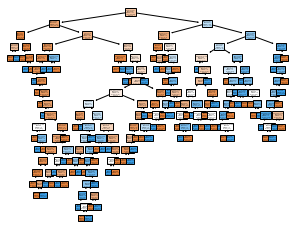

In [56]:
# Let's plot the tree using Matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,4))
_ = tree.plot_tree(clf, 
                   feature_names = feature_cols,class_names=['0','1'],
                   filled=True)

In [39]:
# Save figure to a .png file
fig.savefig("decistion_tree.png")

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

## Optimizing Decision Tree Performance  

* __criterion: optional (default=”gini”) or Choose attribute selection measure__: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* __splitter: string, optional (default=”best”) or Split Strategy__: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* __max_depth: int or None, optional (default=None) or Maximum Depth of a Tree__: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier is performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


### Visualizing The Decision Trees

We use Option 2, from above.

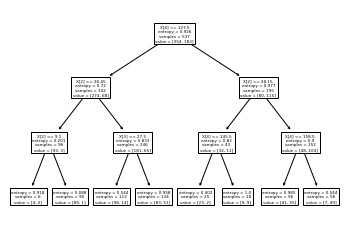

In [58]:
tree.plot_tree(clf);

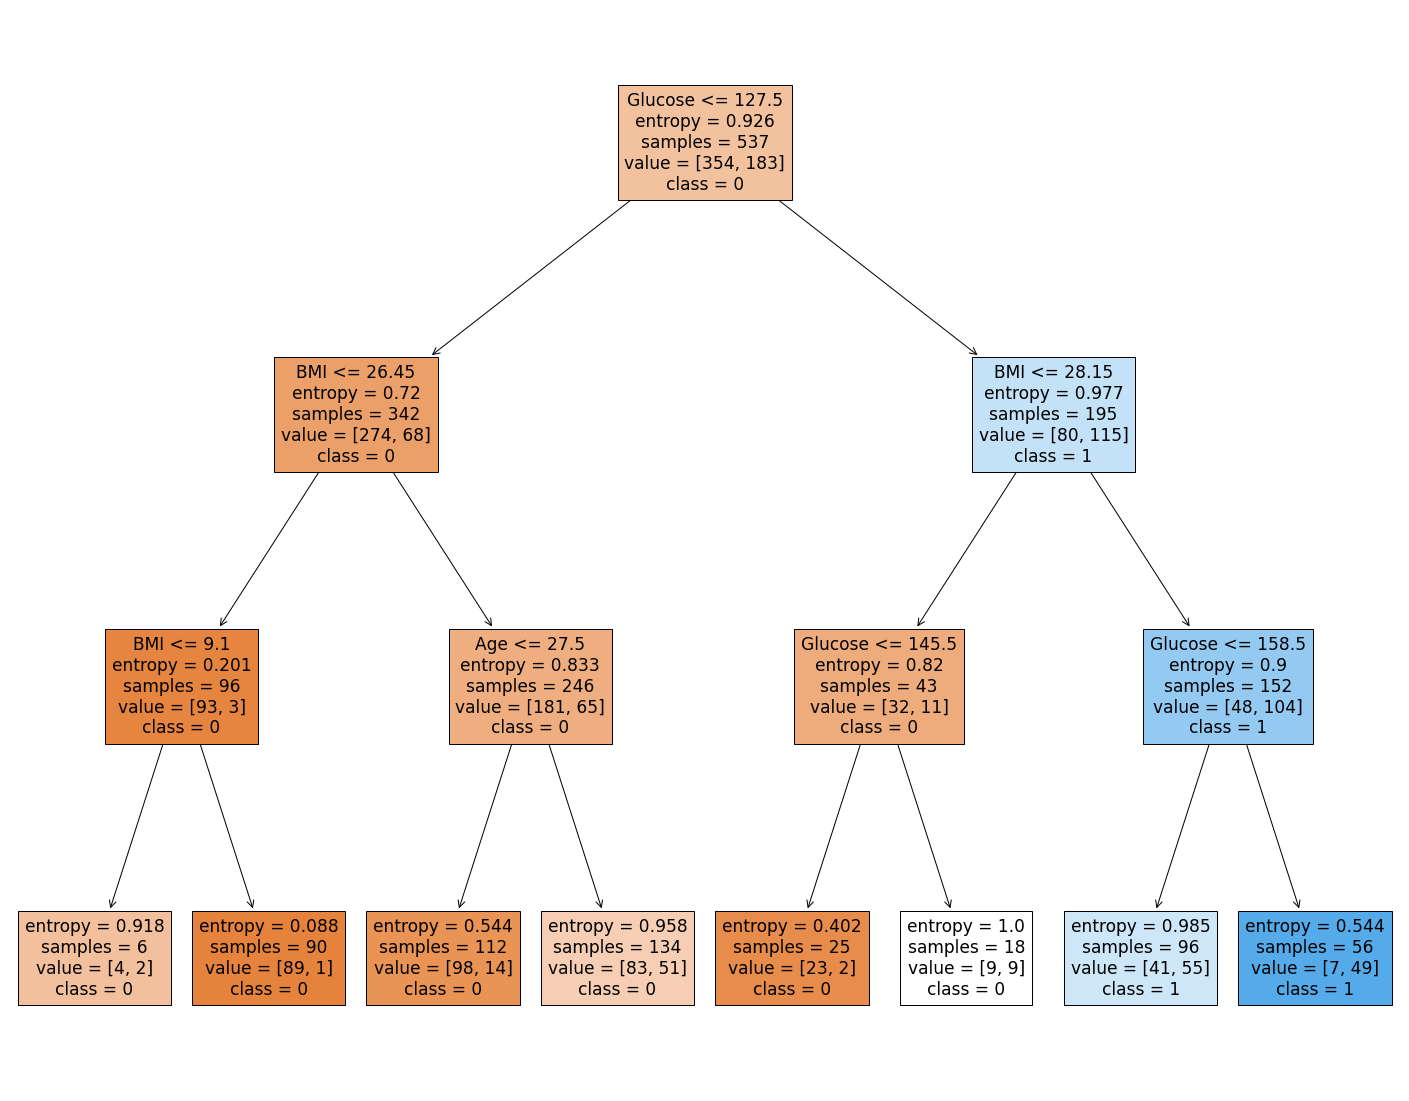

In [61]:
# Let's plot the tree using Matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = feature_cols,class_names=['0','1'],
                   filled=True)

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

### Pros 
* Decision trees are easy to interpret and visualize.
* It can easily capture Non-linear patterns.
* It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
* It can be used for feature engineering such as predicting missing values, suitable for variable selection.
* The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. ([Source](https://scikit-learn.org/stable/modules/tree.html))

### Cons  
* Sensitive to noisy data. It can overfit noisy data.
* The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
* Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.


# Conclusion  

Congratulations, you have made it to the end of this tutorial!

In this tutorial, you covered a lot of details about Decision Tree; It's working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on diabetes dataset using Python Scikit-learn package. Also, discussed its pros, cons, and optimizing Decision Tree performance using parameter tuning.